In [15]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams
from scipy.io import loadmat
from scipy.sparse.linalg import svds
import pandas as pd
import warnings
from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings('ignore')

#Setting up Persistent Homology

#Creating Persistent Homology

In [16]:
# Generate noisy data on two concentric spheres
D = 2
N = 1000
K = 2
trueLabels = np.append(np.ones([int(N/2), 1]), 2 * np.ones([int(N/2), 1])).reshape(N,1)

var = 0.01

# cluster 1
X1 = np.random.randn(D, int(N/2))
X1 = X1 / np.tile(np.sqrt(sum(X1**2)), (D,1))
X1 = X1 + np.tile(np.sqrt(var) * np.random.randn(1, int(N/2)), (D,1))

# cluster 2
X2 = np.random.randn(D, int(N/2))
X2 = 2*X2 / np.tile(np.sqrt(sum(X2**2)), (D,1))
X2 = X2 + np.tile(np.sqrt(var) * np.random.randn(1, int(N/2)), (D,1))

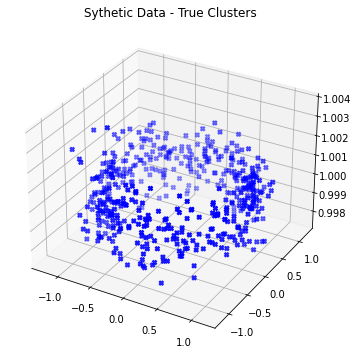

In [17]:
X = X1

# Data visualization
plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
#plt.scatter(X[0], X[1], marker='X')
Z = np.random.normal(1,.001,len(X[1]))
ax.scatter3D(X[0], X[1], Z,marker='X', c='blue')
#plt.scatter(X[0, int(N/2):N], X[1, int(N/2):N], marker='X')
plt.title("Sythetic Data - True Clusters")
plt.show()

In [4]:
result = ripser(X.T, coeff=2, do_cocycles=True)
diagrams = result['dgms']
cocycles = result['cocycles']
D = result['dperm2all']

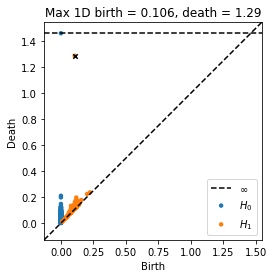

In [5]:
dgm1 = diagrams[1]
idx = np.argmax(dgm1[:, 1] - dgm1[:, 0])
plot_diagrams(diagrams, show = False)
plt.scatter(dgm1[idx, 0], dgm1[idx, 1], 20, 'k', 'x')
plt.title("Max 1D birth = %.3g, death = %.3g"%(dgm1[idx, 0], dgm1[idx, 1]))
plt.show()

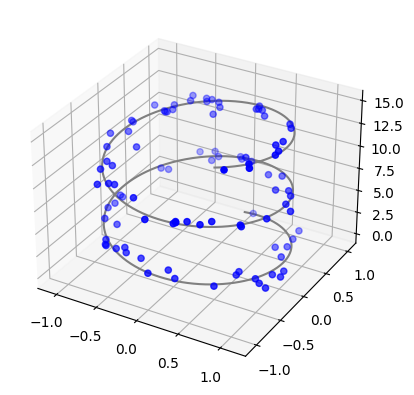

In [6]:

ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c='blue');
plt.show()

In [7]:
R = np.vstack((xdata,ydata))
R = np.vstack((R,zdata))
print(R.shape)

(3, 100)


In [8]:
result = ripser(R.T, coeff=2, do_cocycles=True)
diagrams = result['dgms']
cocycles = result['cocycles']
D = result['dperm2all']

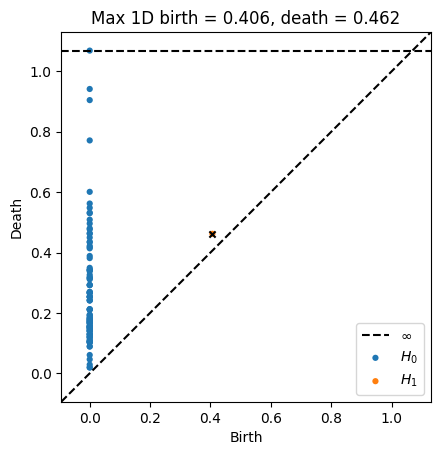

In [9]:
dgm1 = diagrams[1]
idx = np.argmax(dgm1[:, 1] - dgm1[:, 0])
plot_diagrams(diagrams, show = False)
plt.scatter(dgm1[idx, 0], dgm1[idx, 1], 20, 'k', 'x')
plt.title("Max 1D birth = %.3g, death = %.3g"%(dgm1[idx, 0], dgm1[idx, 1]))
plt.show()

In [10]:
import plotly.graph_objects as go
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/vortex.csv")

fig = go.Figure(data = go.Cone(
    x=df['x'],
    y=df['y'],
    z=df['z'],
    u=df['u'],
    v=df['v'],
    w=df['w'],
    colorscale='Blues',
    sizemode="absolute",
    sizeref=40))

fig.update_layout(scene=dict(aspectratio=dict(x=1, y=1, z=0.8),
                             camera_eye=dict(x=1.2, y=1.2, z=0.6)))

fig.show()